In [17]:
# get tweets from file

import csv

class Tweet:
    def __init__(self, country, tweet, language, codeswitched, named, generated):
        self.tweet = tweet
        self.language = language # 0 English 1 non English 2 Ambiguous
        self.codeswitched = codeswitched
        self.named = named
        self.generated = generated
        self.country = country
    
    def is_codeswitched(self):
        return self.codeswitched==1
    
    def __str__(self):
        return self.tweet
    
    def __repr__(self):
        return self.tweet + " " + self.country

fpath = "/Users/anisha/Downloads/all_annotated.tsv"
tweets = []
codeswitched_tweets = []
countries = set()
lines_read = 0
cutoff_num = 10000
# go through set number of messages
with open(fpath) as file:
    tweets_file = csv.reader(file, delimiter="\t")
    for tweet in tweets_file:
        lines_read += 1
        if lines_read==1: # skip heading
            continue
        for i in range(4, 10):
            tweet[i] = int(tweet[i])
        if (tweet[4]==1):
            language = 0
        elif tweet[5]==1:
            language = 2
        elif tweet[6]==1:
            language = 1
        tweetObj = Tweet(tweet[1], tweet[3], language, tweet[7], tweet[8], tweet[9])
        tweets.append(tweetObj)
        countries.add(tweetObj.country)
        if tweetObj.is_codeswitched():
            codeswitched_tweets.append(tweetObj)
        if lines_read==cutoff_num:
            break

for tweet in codeswitched_tweets:
    print (tweet.tweet + " " + tweet.country)


Fifi gatal! Takk abes2 nk double meaning. Iyewwww. MY
@Bigetao era p falar no chat hahhah deixa então...boa noite,te amo...sleep tight BR
I miss that time, when you text me and said 'iman, tolong aku..' it surprised me !! XD im really miss that time. XD MY
Utálom a nyelvtant és a tételeit is... #HateGrammar HU
Coisas horriveis S2 #friends @ casa da Bia. http://t.co/AmGGYre5 BR
Lo que canta mi.amiga presente  \I knew you where tra traca tra tra\" -.- #wow @VelazquezJay" US
Trending topiqnya kok upayyy yay ID
Bitches and bottles #micasa US
Deadline tugas, deadline TA, deadline EO, deadliiiiiiineeeee.... ID
Fuckk me tendre que quitar mi mechon rojo ni pei MX
Lps mkn bru check in! (@ Taj Curry House w/ @apekkev) http://t.co/5lYIqNWlJF MY
Congratsss&lt;3 \@gilaangpradana: mention dibales , skrg difollback fatin \\(´▽`)/\"" ID
Huahaha nooooooo thanks! @zararimar: Wuahhaa-_-lau cewe eskrimnya yah wkwk\@AnnisaRy13: yah kan diserbu gue sama anti TKA! haha" ID
@SeLviiD meeting cintahhhh.. Skrg t

90 352
{'US': 2810, 'BR': 1162, 'ID': 1060, 'TR': 593, 'JP': 473, 'GB': 461, 'MY': 377, 'ES': 316, 'AR': 305, 'FR': 263, 'PH': 223, 'MX': 215, 'RU': 159, 'TH': 146, 'CA': 117, 'IT': 89, 'CL': 85, 'NL': 78, 'ZA': 65, 'CO': 60, 'SA': 57, 'PT': 56, 'DE': 47, 'UY': 39, 'KW': 37, 'AU': 36, 'VE': 34, 'SE': 33, 'IE': 32, 'SG': 32, 'IN': 27, 'UA': 26, 'NG': 25, 'BE': 22, 'EG': 21, 'PY': 19, 'CH': 18, 'BY': 15, 'PL': 14, 'DO': 12, 'AE': 12, 'GH': 12, 'KE': 12, 'PA': 11, 'LV': 11, 'KR': 11, 'PE': 11, 'PR': 10, 'CR': 10, 'EC': 10, '': 9, 'RS': 9, 'GR': 9, 'CN': 8, 'TW': 8, 'NO': 8, 'SV': 7, 'GT': 7, 'JO': 6, 'HU': 6, 'LK': 6, 'FI': 6, 'CM': 5, 'AT': 5, 'HK': 5, 'JM': 5, 'PK': 5, 'CZ': 5, 'DZ': 4, 'BH': 4, 'IL': 4, 'EE': 4, 'TT': 4, 'MA': 3, 'KZ': 3, 'YE': 3, 'NZ': 3, 'IQ': 3, 'LY': 3, 'RO': 3, 'XK': 3, 'VN': 3, 'DK': 3, 'QA': 3, 'HN': 3, 'IR': 2, 'GE': 2, 'NP': 2, 'LU': 2, 'SY': 2, 'UZ': 2, 'MN': 2, 'CY': 2, 'LB': 2, 'NE': 2, 'BS': 2, 'NA': 1, 'AQ': 1, 'TN': 1, 'MQ': 1, 'SL': 1, 'AZ': 1, 'ZM': 1,

Text(0.5, 1.0, 'Count of Tweets By Country')

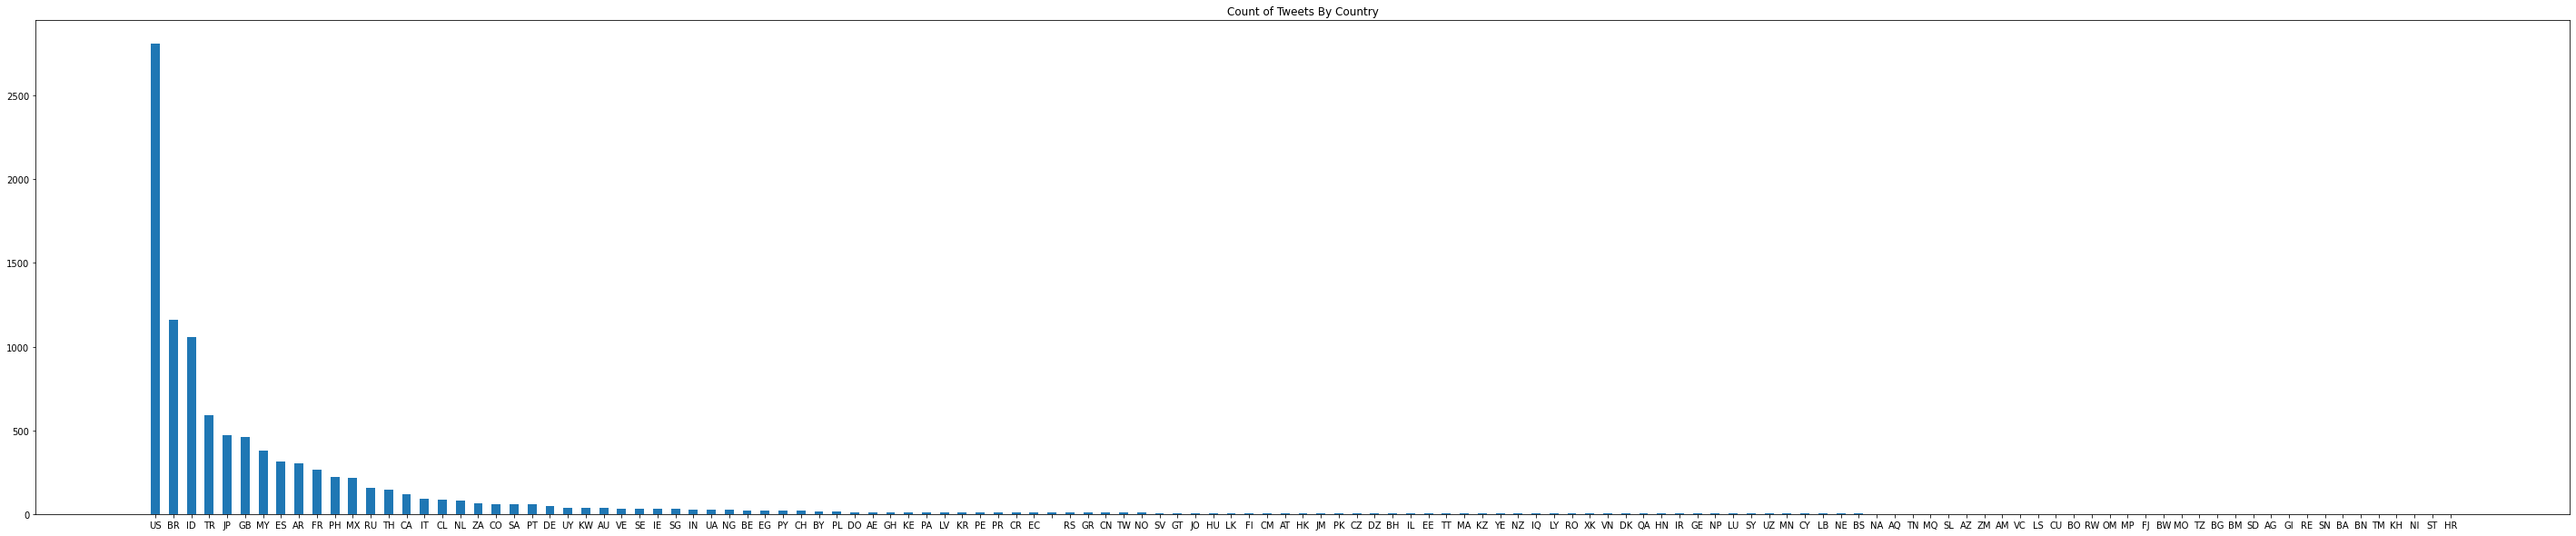

In [23]:
# count tweets by country

count_all_by_country = {}
for country in countries:
    count_all_by_country[country] = 0

for tweet in tweets:
    count_all_by_country[tweet.country] += 1

count_tweets = 0
count_country = 0
for country in countries:
    if (count_all_by_country[country] <= 12):
        count_country += 1
        count_tweets += count_all_by_country[country]
        #del count_all_by_country[country]

print(count_country, count_tweets)

count_all_by_country = dict(sorted(count_all_by_country.items(), key=lambda item: item[1], reverse=True))
print(count_all_by_country)

plt.figure(figsize=(50, 10))

plt.bar(range(len(count_all_by_country)), list(count_all_by_country.values()), align='center', width=0.5)
plt.xticks(range(len(count_all_by_country)), list(count_all_by_country.keys()))
plt.title("Count of Tweets By Country")

{'ID': 39, 'PH': 23, 'MY': 19, 'US': 9, 'BR': 8, 'TR': 6, 'FR': 5, 'ES': 5, 'JP': 4, 'TH': 4, 'MX': 3, 'DE': 3, 'RU': 2, 'NL': 2, 'GB': 1, 'SE': 1, 'ZA': 1, 'PY': 1, 'SG': 1, 'IN': 1, 'CA': 1, 'AR': 1}


Text(0.5, 1.0, 'Count of Code-Switched Tweets By Country')

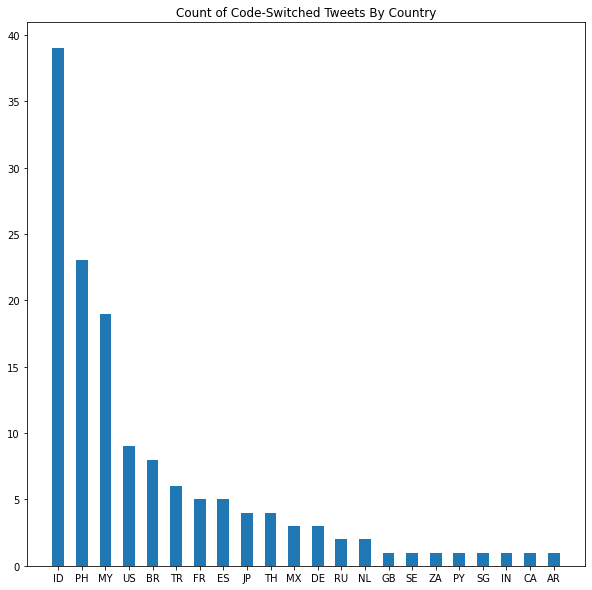

In [31]:
# create bar graph of code switching by country
import matplotlib.pyplot as plt

count_by_country = {}
for tweet in codeswitched_tweets:
    count_by_country[tweet.country] = 0

for tweet in codeswitched_tweets:
    count_by_country[tweet.country] += 1

for country in countries:
    if (country in count_by_country and count_all_by_country[country] <= 12):
        del count_by_country[country]

#print(count_by_country)
count_by_country = dict(sorted(count_by_country.items(), key=lambda item: item[1], reverse=True))
print(count_by_country)

plt.figure(figsize=(10, 10))

plt.bar(range(len(count_by_country)), list(count_by_country.values()), align='center', width=0.5)
plt.xticks([i for i in range(len(count_by_country))], list(count_by_country.keys()))
plt.title("Count of Code-Switched Tweets By Country")



{'PH': 10.31390134529148, 'DE': 6.382978723404255, 'PY': 5.263157894736842, 'MY': 5.039787798408488, 'IN': 3.7037037037037033, 'ID': 3.6792452830188678, 'SG': 3.125, 'SE': 3.0303030303030303, 'TH': 2.73972602739726, 'NL': 2.564102564102564, 'FR': 1.9011406844106464, 'ES': 1.5822784810126582, 'ZA': 1.5384615384615385, 'MX': 1.3953488372093024, 'RU': 1.257861635220126, 'TR': 1.0118043844856661, 'CA': 0.8547008547008548, 'JP': 0.8456659619450317, 'BR': 0.6884681583476765, 'AR': 0.32786885245901637, 'US': 0.3202846975088968, 'GB': 0.21691973969631237}


Text(0.5, 1.0, 'Percentage of Code-Switched Tweets By Country')

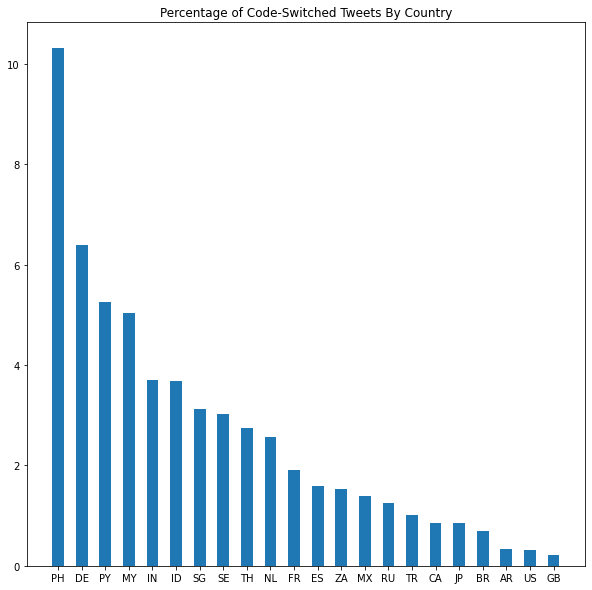

In [15]:
# find percentage of code-switched tweets by country

percentage_by_country = {}
for country in count_by_country:
    if count_all_by_country[country] > 12:
        percentage_by_country[country] = (count_by_country[country]/count_all_by_country[country]) * 100

percentage_by_country = dict(sorted(percentage_by_country.items(), key=lambda item: item[1], reverse=True))
print(percentage_by_country)

plt.figure(figsize=(10, 10))

plt.bar(range(len(percentage_by_country)), list(percentage_by_country.values()), align='center', width=0.5)
plt.xticks(range(len(percentage_by_country)), list(percentage_by_country.keys()))
plt.title("Percentage of Code-Switched Tweets By Country")

